Importing the libraries


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Consolidating the datasets


In [40]:
Labels = ["Age", "Sex", "Cp", "Restbps", "Chol", "Fbs", "Restecg", "Heartrate", "Exerciseangina","Oldpeak", "Slope", "Ca", "Thal", "Num"]

df =pd.read_csv('/content/drive/MyDrive/ASSESMENT_TRIMESTER_001/AAI_ASSESMENT_PROJECT_TRIMESTER_001/AAI_PROJECT_DATASET_HEART_DISEASE/Processed_Dataset/cleveland_data.csv', names = Labels )

tdf = df.copy()

tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             303 non-null    float64
 1   Sex             303 non-null    float64
 2   Cp              303 non-null    float64
 3   Restbps         303 non-null    float64
 4   Chol            303 non-null    float64
 5   Fbs             303 non-null    float64
 6   Restecg         303 non-null    float64
 7   Heartrate       303 non-null    float64
 8   Exerciseangina  303 non-null    float64
 9   Oldpeak         303 non-null    float64
 10  Slope           303 non-null    float64
 11  Ca              303 non-null    object 
 12  Thal            303 non-null    object 
 13  Num             303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [41]:
null = tdf.isnull().sum()
print(null)

Age               0
Sex               0
Cp                0
Restbps           0
Chol              0
Fbs               0
Restecg           0
Heartrate         0
Exerciseangina    0
Oldpeak           0
Slope             0
Ca                0
Thal              0
Num               0
dtype: int64


Checking the number of rows and columns


In [42]:
tdf.shape

(303, 14)

Finding the rows which contains 'NaN' values in the column of 'Thal'

In [43]:
tdf[tdf.Thal == '?']

,Age,Sex,Cp,Restbps,Chol,Fbs,Restecg,Heartrate,Exerciseangina,Oldpeak,Slope,Ca,Thal,Num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


Finding the rows which contains 'NaN' values in the column of 'Ca'

In [44]:
tdf[tdf.Ca == '?']

,Age,Sex,Cp,Restbps,Chol,Fbs,Restecg,Heartrate,Exerciseangina,Oldpeak,Slope,Ca,Thal,Num
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [45]:
#Creating a list of "Not a number" attributes which conatins "?"
Ca_NAN_idx= tdf.index[tdf.Ca == '?'].tolist()
Thal_NAN_idx = tdf.index[tdf.Thal == '?'].tolist()
# Concatenating lists into a single variable
drop_idx = Ca_NAN_idx + Thal_NAN_idx
tdf = tdf.drop(tdf.index[drop_idx])

print(tdf)

      Age  Sex   Cp  Restbps   Chol  Fbs  Restecg  Heartrate  Exerciseangina  \
0    63.0  1.0  1.0    145.0  233.0  1.0      2.0      150.0             0.0   
1    67.0  1.0  4.0    160.0  286.0  0.0      2.0      108.0             1.0   
2    67.0  1.0  4.0    120.0  229.0  0.0      2.0      129.0             1.0   
3    37.0  1.0  3.0    130.0  250.0  0.0      0.0      187.0             0.0   
4    41.0  0.0  2.0    130.0  204.0  0.0      2.0      172.0             0.0   
..    ...  ...  ...      ...    ...  ...      ...        ...             ...   
297  57.0  0.0  4.0    140.0  241.0  0.0      0.0      123.0             1.0   
298  45.0  1.0  1.0    110.0  264.0  0.0      0.0      132.0             0.0   
299  68.0  1.0  4.0    144.0  193.0  1.0      0.0      141.0             0.0   
300  57.0  1.0  4.0    130.0  131.0  0.0      0.0      115.0             1.0   
301  57.0  0.0  2.0    130.0  236.0  0.0      2.0      174.0             0.0   

     Oldpeak  Slope   Ca Thal  Num  
0 

Data verification

In [46]:
null = tdf.isnull().sum()
print(null)

Age               0
Sex               0
Cp                0
Restbps           0
Chol              0
Fbs               0
Restecg           0
Heartrate         0
Exerciseangina    0
Oldpeak           0
Slope             0
Ca                0
Thal              0
Num               0
dtype: int64


In [47]:
tdf.shape

(297, 14)

Exploratory Data Analysis

In [48]:
tdf.head(5)

,Age,Sex,Cp,Restbps,Chol,Fbs,Restecg,Heartrate,Exerciseangina,Oldpeak,Slope,Ca,Thal,Num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [49]:
tdf.describe()

,Age,Sex,Cp,Restbps,Chol,Fbs,Restecg,Heartrate,Exerciseangina,Oldpeak,Slope,Num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


**ANALYSING THE FEATURES USING PAIR PLOT FUNCTION BASED ON THE CLASSES IN 'NUM' COLUMN**

Pair plot gives an overview of the dataset which helps in a quick understanding of the correlation between each factors of the problem.

Here the plot shows that the dark color indicates 'Most critical stage' and the light color indicates 'Initial stage of the patients'

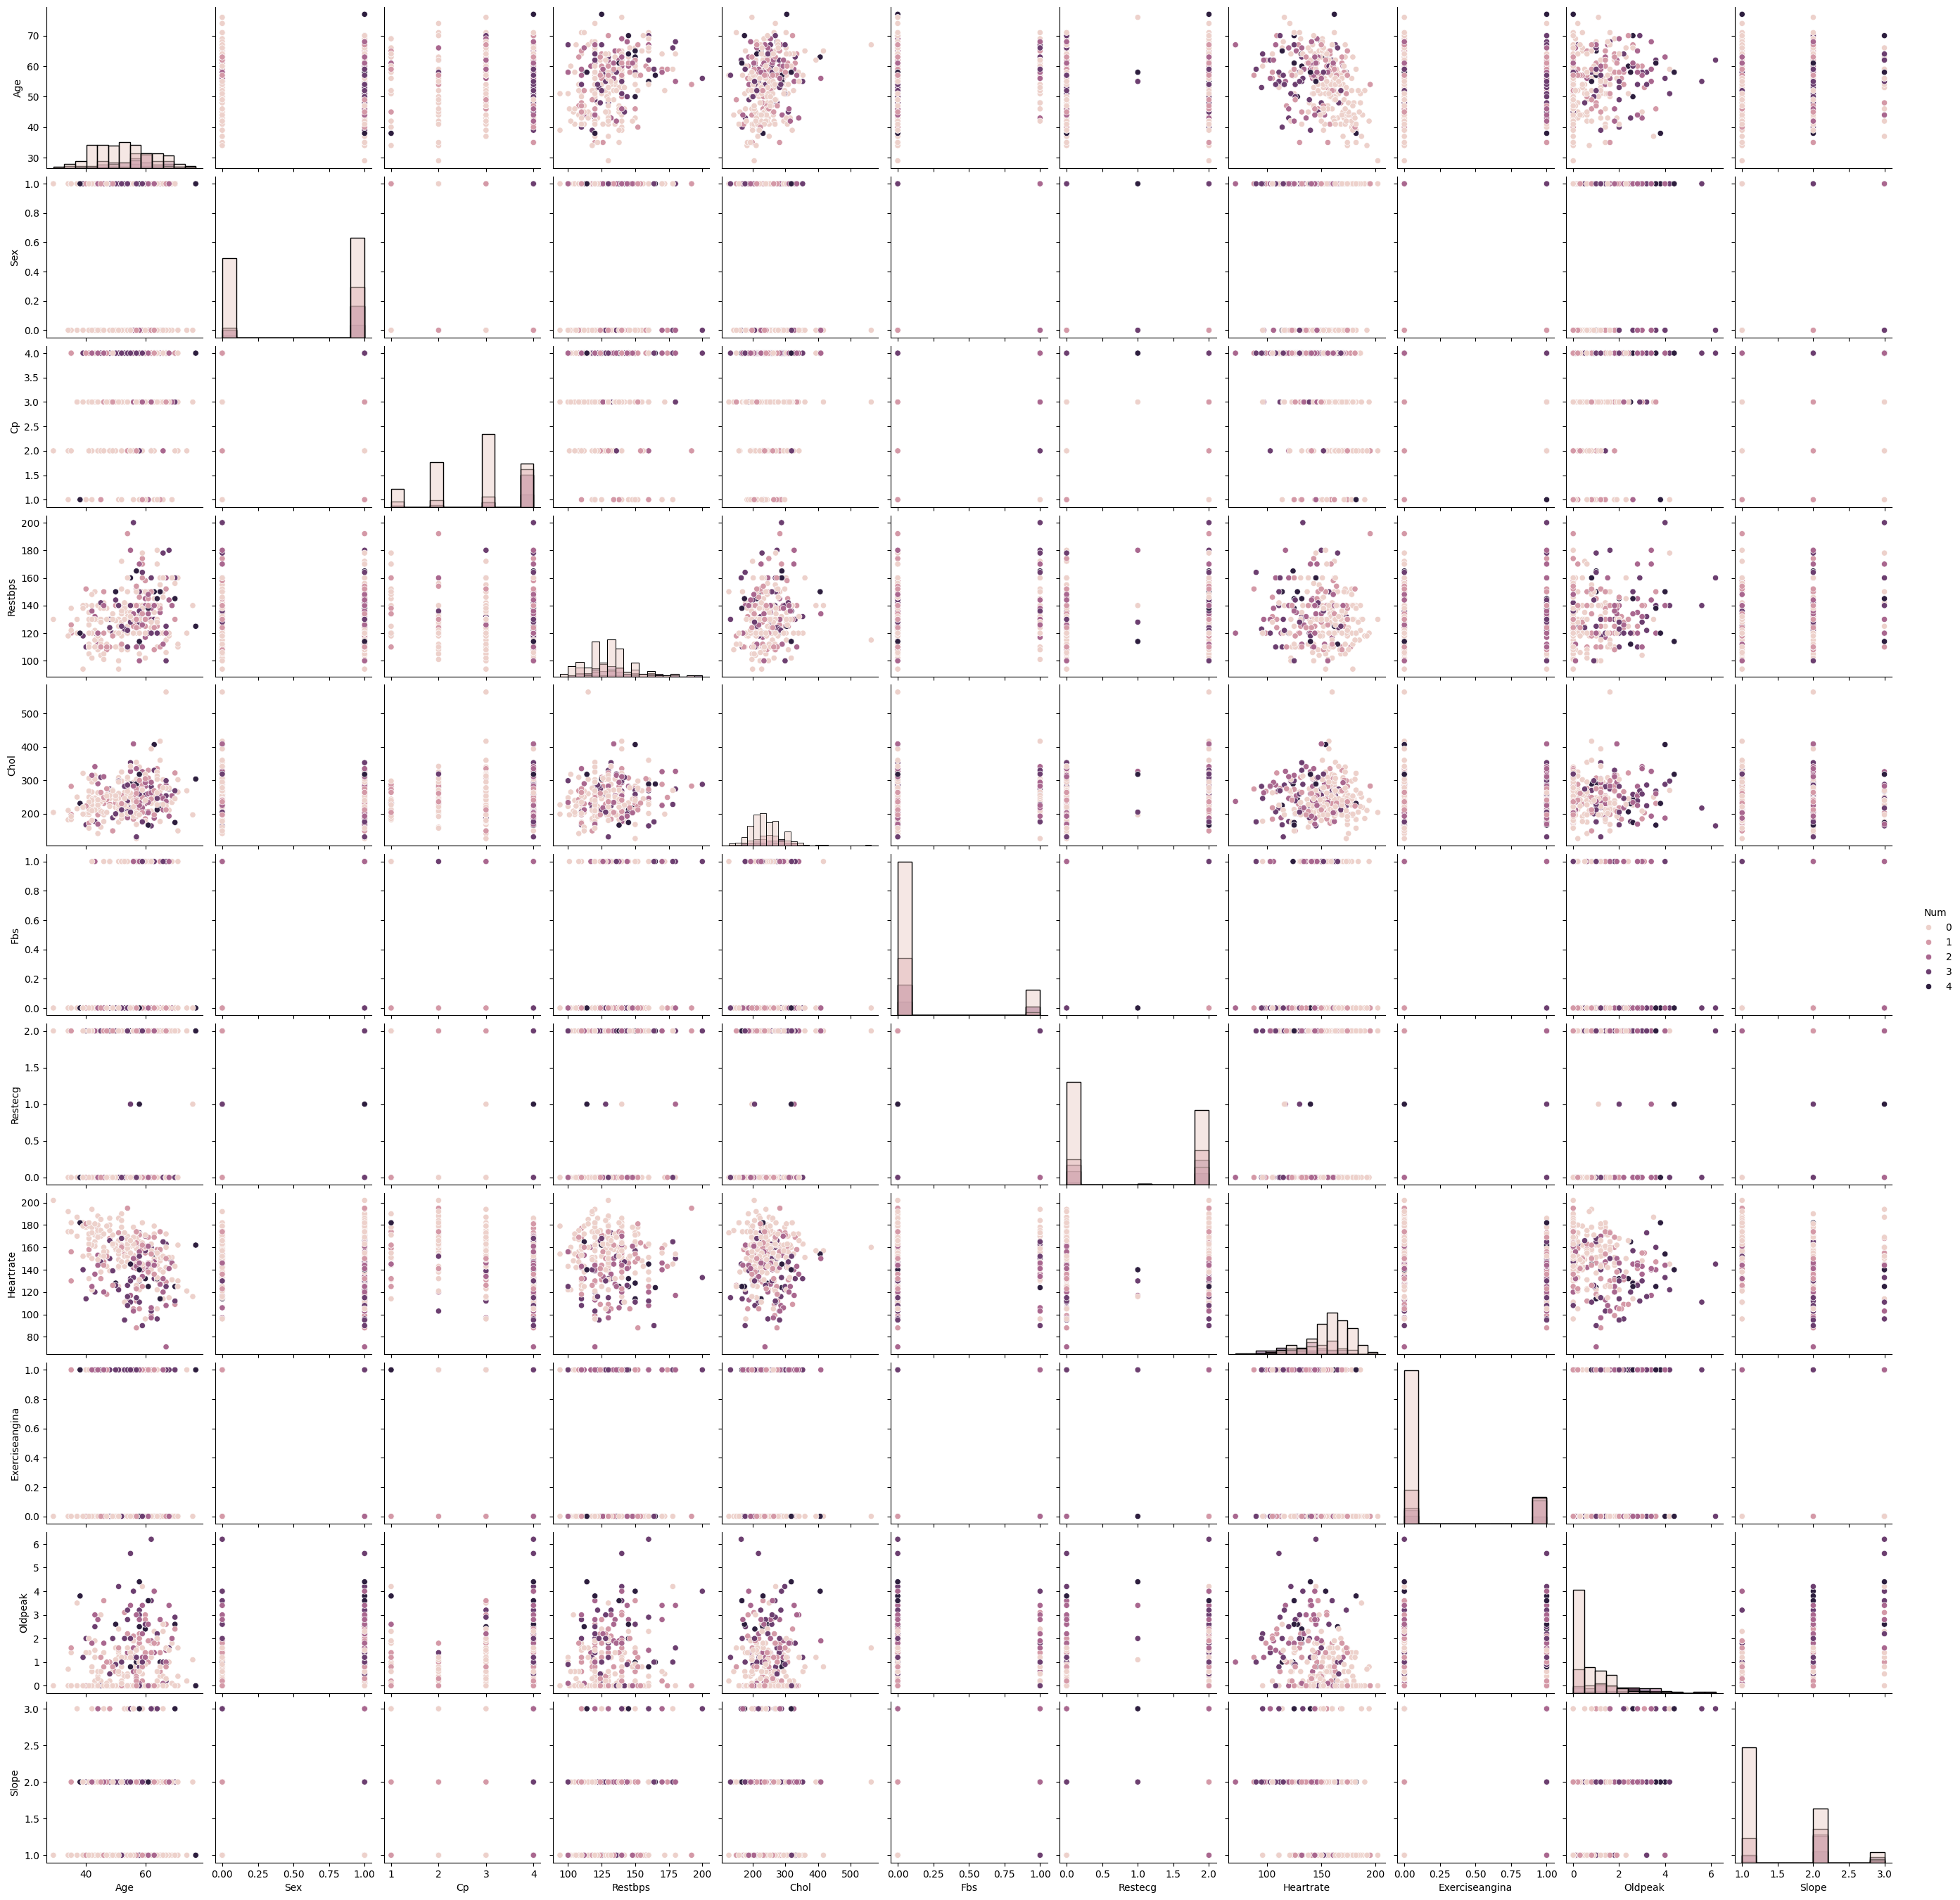

In [50]:
sns.pairplot(tdf, hue = 'Num',diag_kind="hist",plot_kws={'alpha':1});

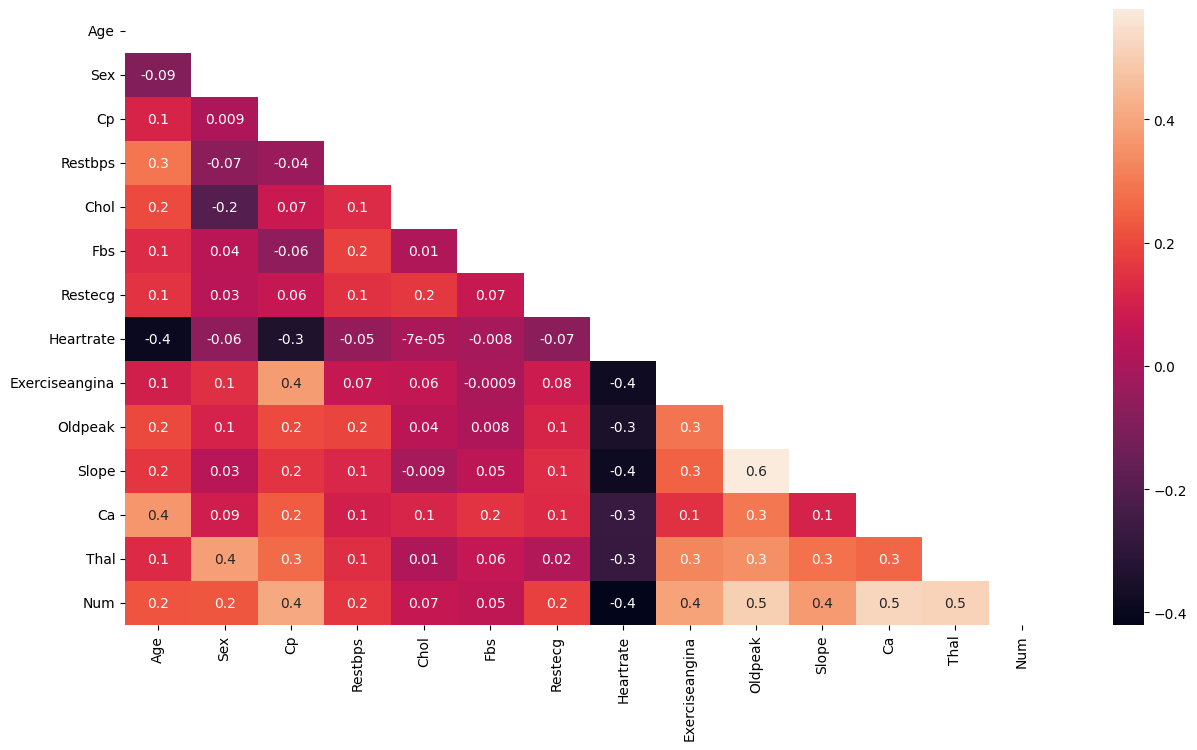

In [51]:
mask = np.triu(np.ones_like(tdf.corr(), dtype=bool))
fig,ax = plt.subplots(figsize=(15,8))
sns.heatmap(tdf.corr(),mask = mask,annot = True, fmt='.1g',ax=ax);

# Exploratory Data Analysis
**UNIVARIATE ANALYSIS**


1. Age : Integer value
2. Sex : '0' - Represents Female : '1' - Represents Male
3. CP : Chest pain Analysis
4. Restbps : Resting Blood pressure
5. Chol : Serum Cholestrol
6. Fbs : Fasting blood sugar
7. Restecg : Resting ECG
8. Heartrate : Maximum Heart rate acheived
9. Exerciseangina : Exercise induced angina
10. Old peak : ST depression induced by exercise relative to rest
11. Slope : the slope of the peak exercise ST segment
12. Num (Y - target column) : It indicates the class of 0,1,2,3,4 based on the conditions of the patients

**DISPLAYING THE DATA COUNTS**


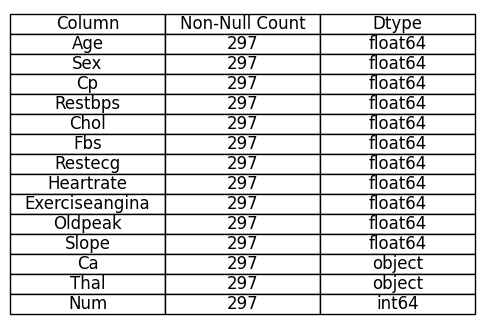

In [52]:
info_tdf = pd.DataFrame({
    'Column': tdf.columns,
    'Non-Null Count': tdf.notnull().sum(),
    'Dtype': tdf.dtypes
})

fig, ax = plt.subplots(figsize=(5, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=info_tdf.values, colLabels=info_tdf.columns, cellLoc = 'center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('dataframe_info.png', bbox_inches='tight', dpi=300)
plt.show()

**AGE ANALYSIS**

Minimum_Age :-  29.0
Maximum_Age :-  77.0


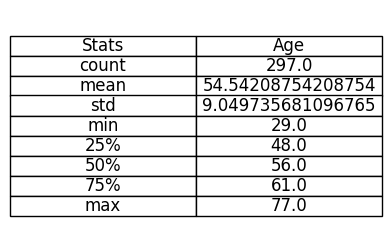

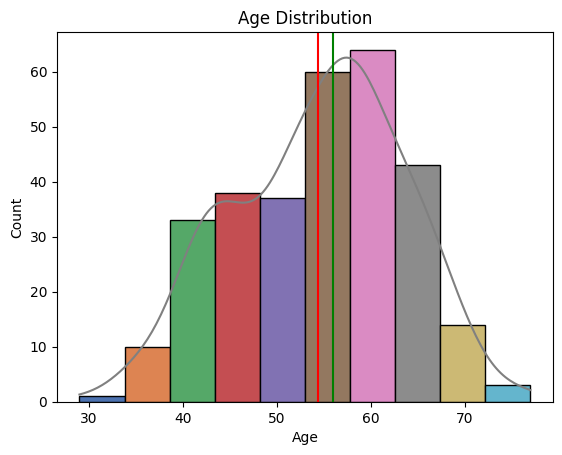

In [53]:
Min_Age = tdf['Age'].min()
Max_Age = tdf['Age'].max()
print("Minimum_Age :- ",Min_Age)
print("Maximum_Age :- ",Max_Age)

age_des = tdf['Age'].describe()
age_des_df = pd.DataFrame(age_des).reset_index()
age_des_df.columns = ['Stats', 'Age']
#print(age_des_df)


fig, ax = plt.subplots(figsize=(4, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=age_des_df.values, colLabels=age_des_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('age_description.png', bbox_inches='tight', dpi=300)
plt.show()


no_of_bars = len(df['Age'].unique())
colors = sns.color_palette("deep", n_colors=no_of_bars)

# Create the histogram with a base color and edge color for visibility
bins = 10
sns.histplot(df['Age'], kde=True, bins=bins, color='grey', edgecolor='black')

# Apply the custom palette to each bar individually
for i, bar in enumerate(plt.gca().patches):
    bar.set_facecolor(colors[i % no_of_bars])

plt.axvline(df['Age'].mean(), color='Red')
plt.axvline(df['Age'].median(), color= 'Green')

# Add a custom title and show the plot
plt.title('Age Distribution')
plt.show()

**SEX ANALYSIS**

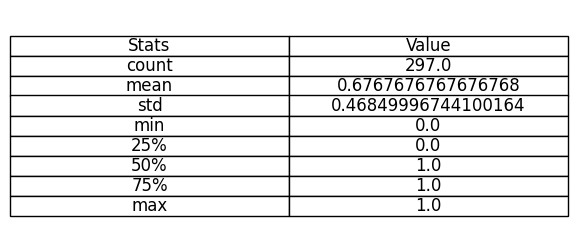

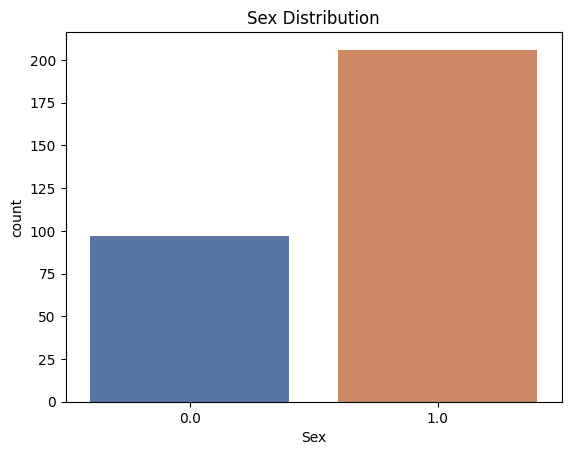

In [54]:
sex_des = tdf['Sex'].describe()
sex_des_df = pd.DataFrame(sex_des).reset_index()
sex_des_df.columns = ['Stats', 'Value']


fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=sex_des_df.values, colLabels=sex_des_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('sex_description.png', bbox_inches='tight', dpi=300)
plt.show()

# Assign specific colors to each category
palette = {"Male": "#0000FF", "Female": "#FF69B4"}

# Create the plot
sns.countplot(x='Sex', data=df, palette='deep')


plt.title('Sex Distribution')

# Show the plot
plt.show()

**CHEST PAIN ANALYSIS**

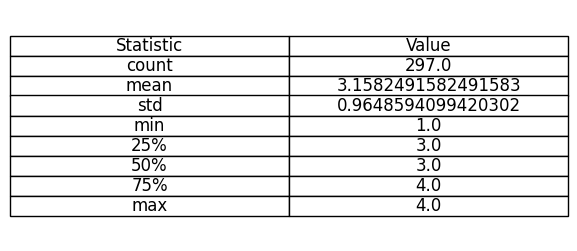

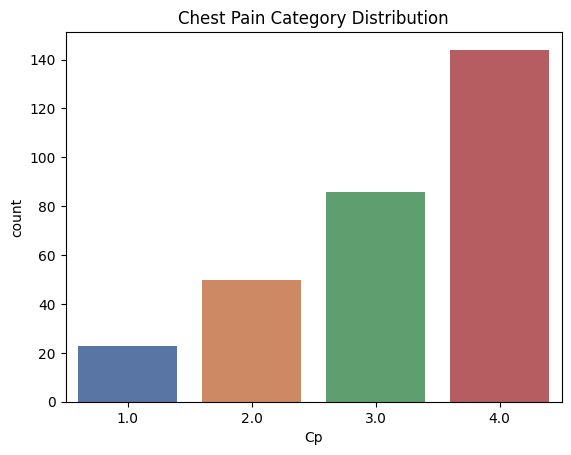

In [55]:
cp_des = tdf['Cp'].describe()

cp_des_df = pd.DataFrame(cp_des).reset_index()
cp_des_df.columns = ['Statistic', 'Value']

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=cp_des_df.values, colLabels=cp_des_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('CHEST_PAIN.png', bbox_inches='tight', dpi=300)
plt.show()

# Create the plot
sns.countplot(x='Cp', data=df, palette='deep')

# Add a custom title
plt.title('Chest Pain Category Distribution')

# Show the plot
plt.show()

**RESTING BLOOD PRESSURE ANALYSIS**

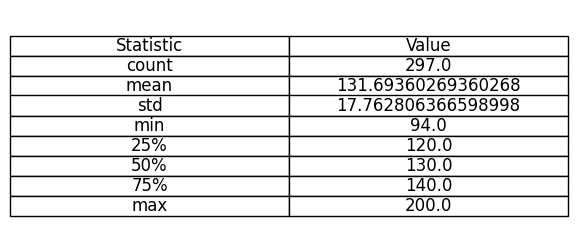

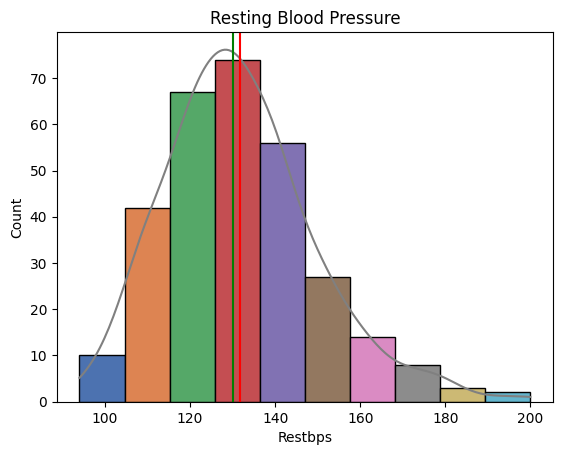

In [56]:
trestbps_des = tdf['Restbps'].describe()

cp_des_df = pd.DataFrame(trestbps_des).reset_index()
cp_des_df.columns = ['Statistic', 'Value']

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=cp_des_df.values, colLabels=cp_des_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('Restbps_description.png', bbox_inches='tight', dpi=300)
plt.show()

# Create a custom color palette for each bar
n_bars = len(df['Restbps'].unique())
colors = sns.color_palette("deep", n_colors=n_bars)

# Create the histogram with a base color and edge color for visibility
bins = 10
sns.histplot(df['Restbps'], kde=True, bins=bins, color='grey', edgecolor='black')

# Apply the custom palette to each bar individually
for i, bar in enumerate(plt.gca().patches):
    bar.set_facecolor(colors[i % n_bars])

plt.axvline(df['Restbps'].mean(), color='Red')
plt.axvline(df['Restbps'].median(), color= 'Green')

# Add a custom title and show the plot
plt.title('Resting Blood Pressure')
plt.show()

**CHOLESTROL ANALYSIS**

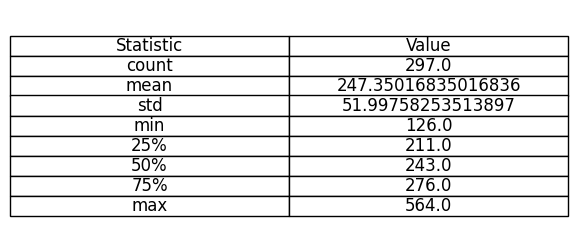

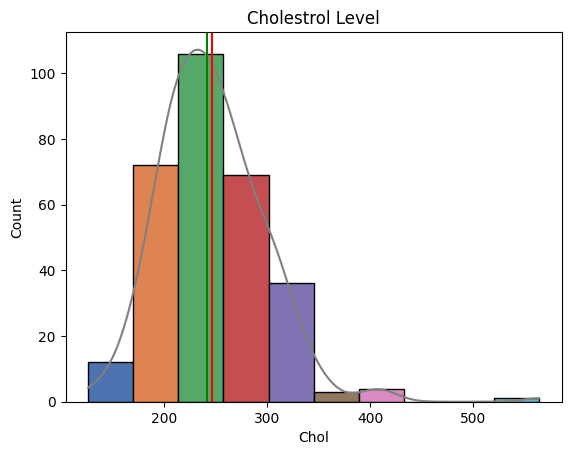

In [57]:
chol_des = tdf['Chol'].describe()

chol_des_df = pd.DataFrame(chol_des).reset_index()
chol_des_df.columns = ['Statistic', 'Value']

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=chol_des_df.values, colLabels=chol_des_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('chol_description.png', bbox_inches='tight', dpi=300)
plt.show()


n_bars = len(df['Chol'].unique())
colors = sns.color_palette("deep", n_colors=n_bars)


bins = 10
sns.histplot(df['Chol'], kde=True, bins=bins, color='grey', edgecolor='black')


for i, bar in enumerate(plt.gca().patches):
    bar.set_facecolor(colors[i % n_bars])

plt.axvline(df['Chol'].mean(), color='Red')
plt.axvline(df['Chol'].median(), color= 'Green')


plt.title('Cholestrol Level')
plt.show()

**FASTING BLOOD SUGAR LEVEL ANALYSIS**

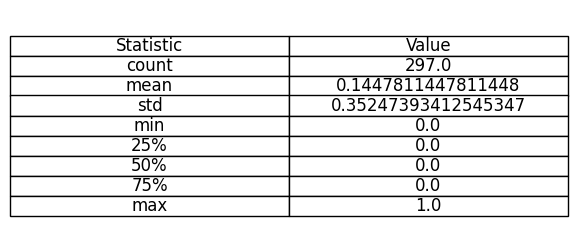

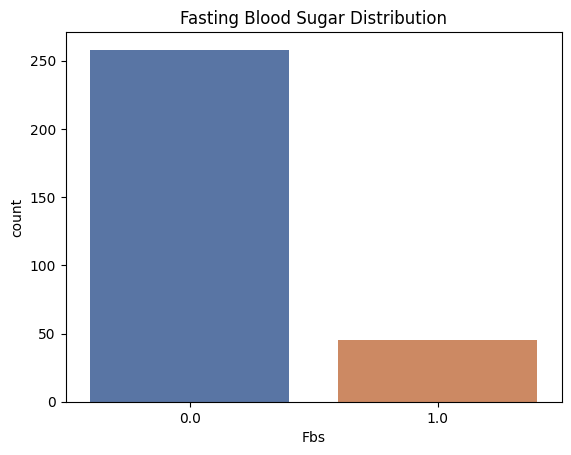

In [58]:
fbs_des = tdf['Fbs'].describe()

fbs_des_df = pd.DataFrame(fbs_des).reset_index()
fbs_des_df.columns = ['Statistic', 'Value']

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=fbs_des_df.values, colLabels=fbs_des_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('fbs_description.png', bbox_inches='tight', dpi=300)
plt.show()


sns.countplot(x='Fbs', data=df, palette='deep')


plt.title('Fasting Blood Sugar Distribution')


plt.show()

**ANALYSIS OF RESTING ELECTRO CARDIO GRAPHIC RESULTS**

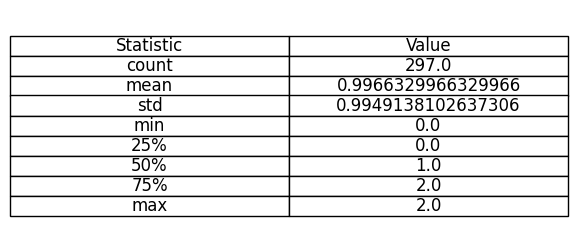

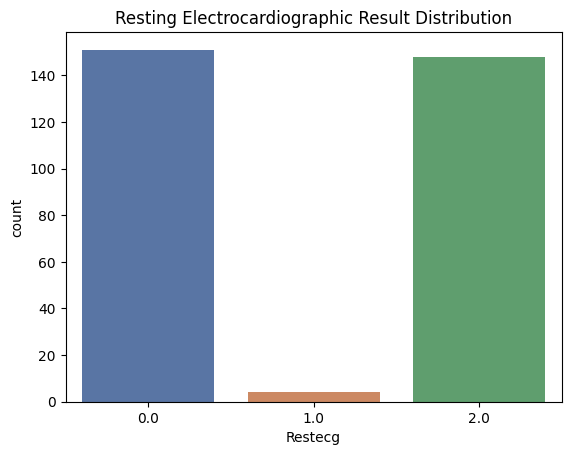

In [59]:
restecg_des = tdf['Restecg'].describe()

restecg_des_df = pd.DataFrame(restecg_des).reset_index()
restecg_des_df.columns = ['Statistic', 'Value']

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=restecg_des_df.values, colLabels=restecg_des_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('restecg_description.png', bbox_inches='tight', dpi=300)
plt.show()


sns.countplot(x='Restecg', data=df, palette='deep')


plt.title('Resting Electrocardiographic Result Distribution')


plt.show()

**ANALYSIS BASED ON THE MAX. HEART RATE ACHEIVED**

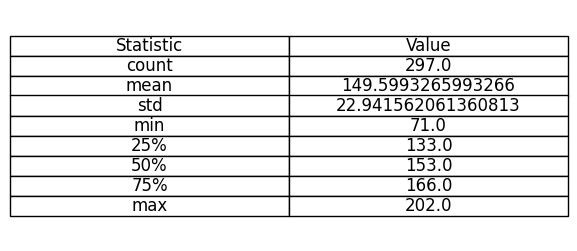

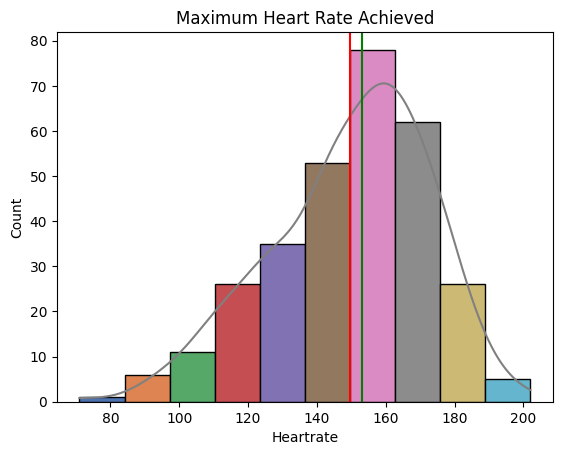

In [60]:
Heartrate_des = tdf['Heartrate'].describe()

Heartrate_des_df = pd.DataFrame(Heartrate_des).reset_index()
Heartrate_des_df.columns = ['Statistic', 'Value']

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=Heartrate_des_df.values, colLabels=Heartrate_des_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('thalch_description.png', bbox_inches='tight', dpi=300)
plt.show()


n_bars = len(df['Heartrate'].unique())
colors = sns.color_palette("deep", n_colors=n_bars)


bins = 10
sns.histplot(df['Heartrate'], kde=True, bins=bins, color='grey', edgecolor='black')


for i, bar in enumerate(plt.gca().patches):
    bar.set_facecolor(colors[i % n_bars])

plt.axvline(df['Heartrate'].mean(), color='Red')
plt.axvline(df['Heartrate'].median(), color= 'Green')


plt.title('Maximum Heart Rate Achieved')
plt.show()

**ANALYSIS BASED ON EXERCISE INDUCED ANGINA**

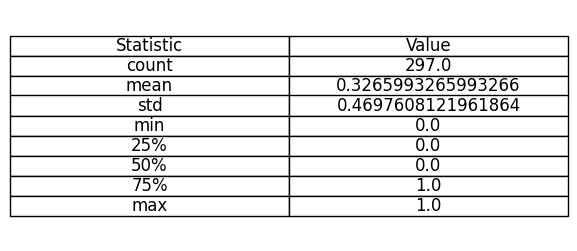

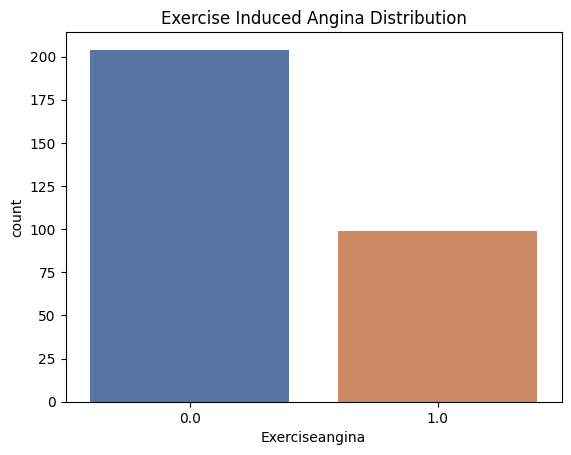

In [61]:
exang_des = tdf['Exerciseangina'].describe()

exang_des_df = pd.DataFrame(exang_des).reset_index()
exang_des_df.columns = ['Statistic', 'Value']

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=exang_des_df.values, colLabels=exang_des_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('exang_description.png', bbox_inches='tight', dpi=300)
plt.show()


sns.countplot(x='Exerciseangina', data=df, palette='deep')


plt.title('Exercise Induced Angina Distribution')


plt.show()

**OLDPEAK ANALYSIS**

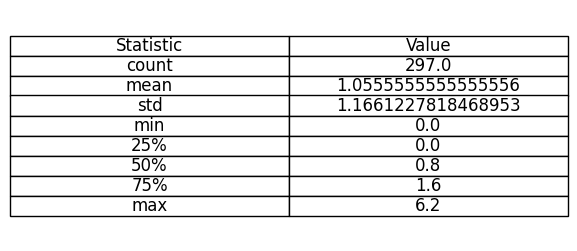

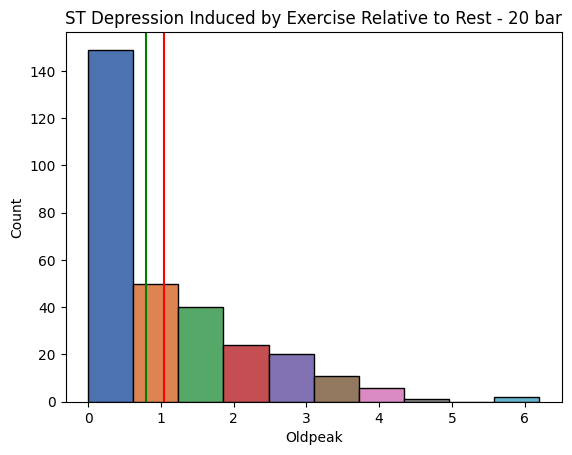

In [62]:
oldpeak_des = tdf['Oldpeak'].describe()

oldpeak_des_df = pd.DataFrame(oldpeak_des).reset_index()
oldpeak_des_df.columns = ['Statistic', 'Value']

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=oldpeak_des_df.values, colLabels=oldpeak_des_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('oldpeak_description.png', bbox_inches='tight', dpi=300)
plt.show()


n_bars = len(df['Oldpeak'].unique())
colors = sns.color_palette("deep", n_colors=n_bars)


bins = 10
sns.histplot(df['Oldpeak'], kde=False, bins=bins, color='grey', edgecolor='black')



for i, bar in enumerate(plt.gca().patches):
    bar.set_facecolor(colors[i % n_bars])

plt.axvline(df['Oldpeak'].mean(), color='Red')
plt.axvline(df['Oldpeak'].median(), color= 'Green')


plt.title('ST Depression Induced by Exercise Relative to Rest - 20 bar')
plt.show()

**SLOPE ANALYSIS**

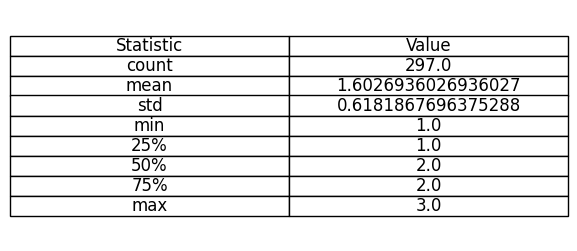

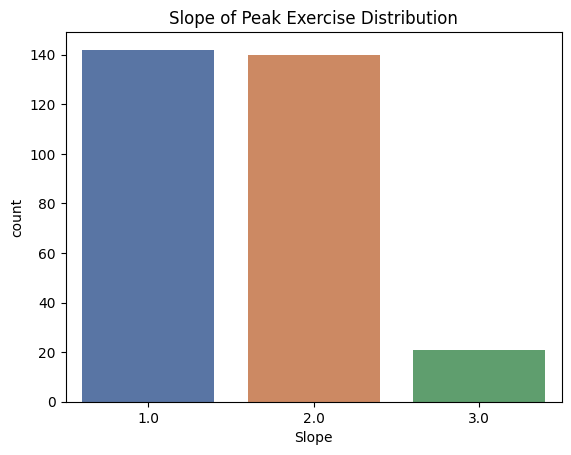

In [63]:
slope_des = tdf['Slope'].describe()

slope_des_df = pd.DataFrame(slope_des).reset_index()
slope_des_df.columns = ['Statistic', 'Value']

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=slope_des_df.values, colLabels=slope_des_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('slope_description.png', bbox_inches='tight', dpi=300)
plt.show()

sns.countplot(x='Slope', data=df, palette='deep')
plt.title('Slope of Peak Exercise Distribution')
plt.show()

**ANALYSIS BASED ON FLUOROSCOPIC DATA**

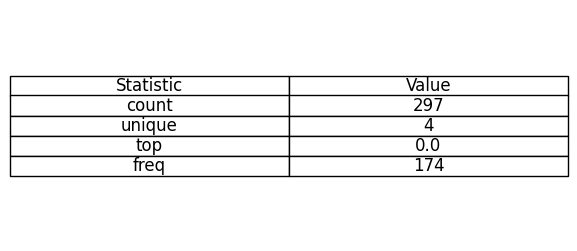

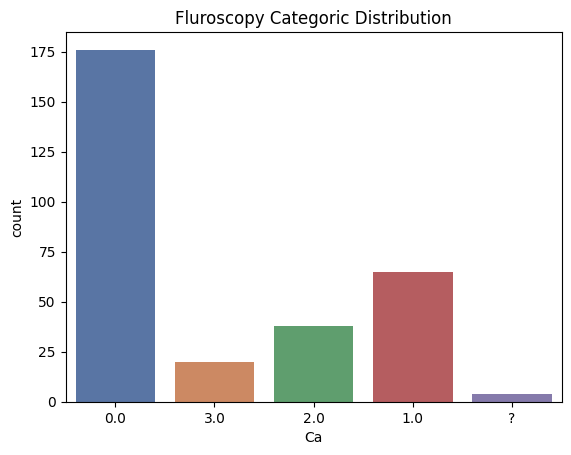

In [64]:
Ca_description = tdf['Ca'].describe()

description_df = pd.DataFrame(Ca_description).reset_index()
description_df.columns = ['Statistic', 'Value']

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=description_df.values, colLabels=description_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('Ca_description.png', bbox_inches='tight', dpi=300)
plt.show()


sns.countplot(x='Ca', data=df, palette='deep')
plt.title('Fluroscopy Categoric Distribution')
plt.show()

Analysis based on the defects

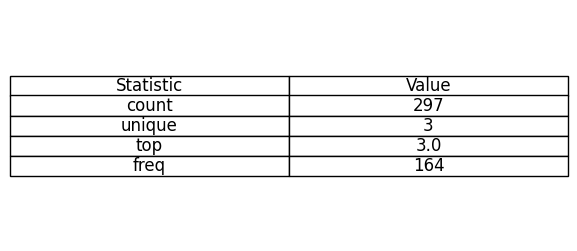

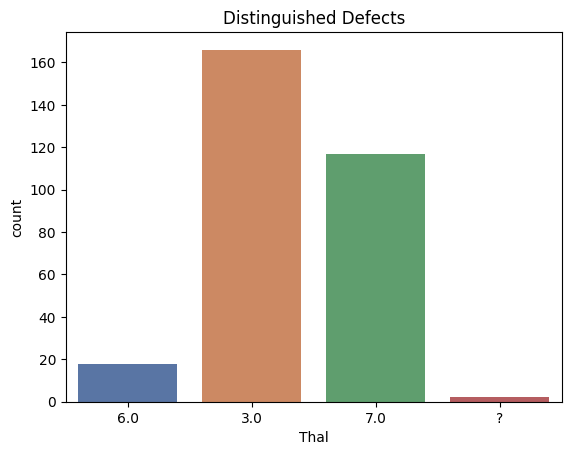

In [65]:
Thal_description = tdf['Thal'].describe()

description_df = pd.DataFrame(Thal_description).reset_index()
description_df.columns = ['Statistic', 'Value']

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=description_df.values, colLabels=description_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('Thal_Description.png', bbox_inches='tight', dpi=300)
plt.show()


sns.countplot(x='Thal', data=df, palette='deep')
plt.title('Distinguished Defects')
plt.show()

**ANALYSIS OF THE PRESENCE OF HEART DISEASE BASED ON THE FEATURES RESPECTIVELY**

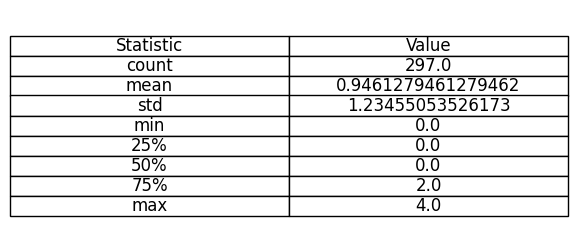

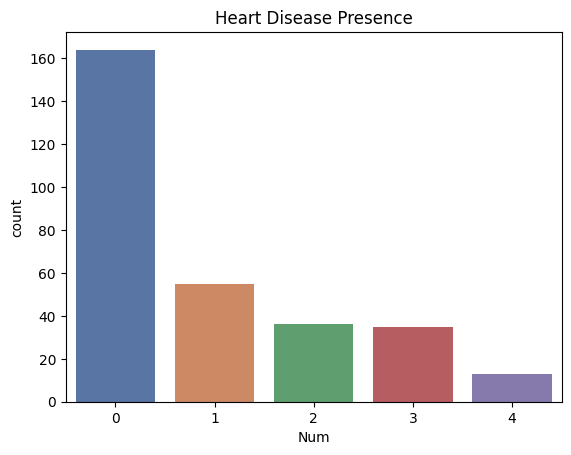

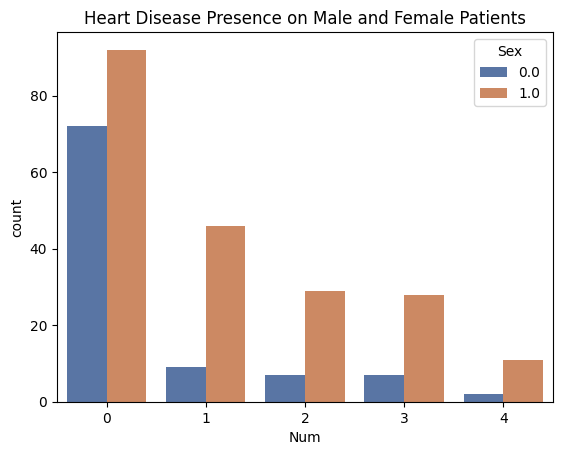

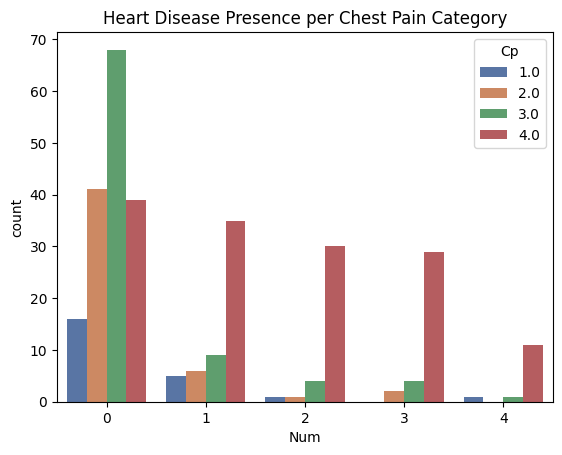

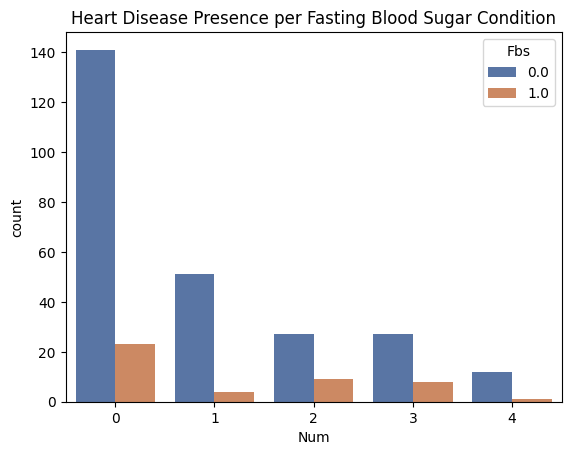

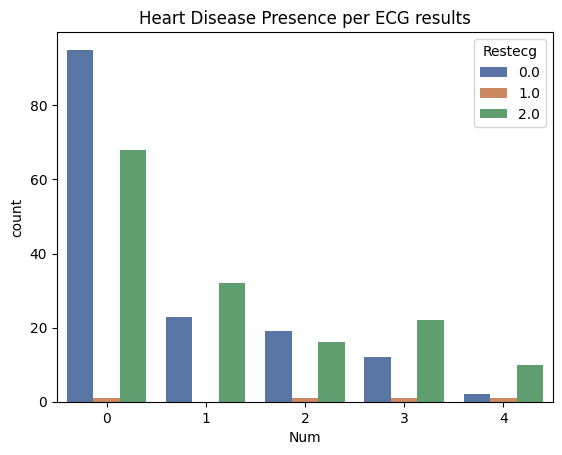

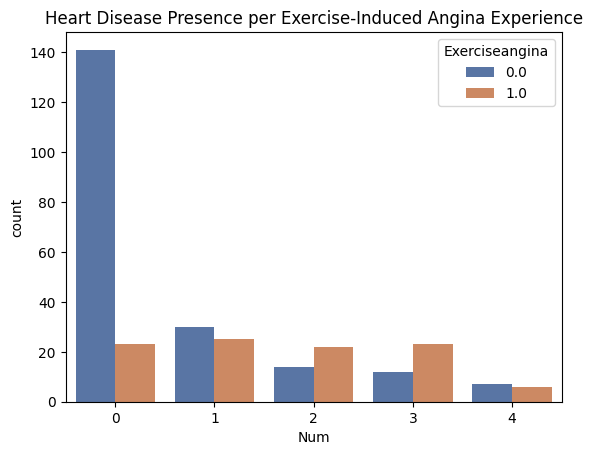

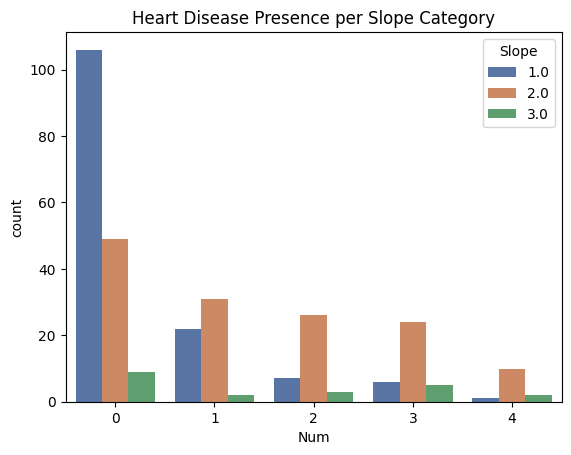

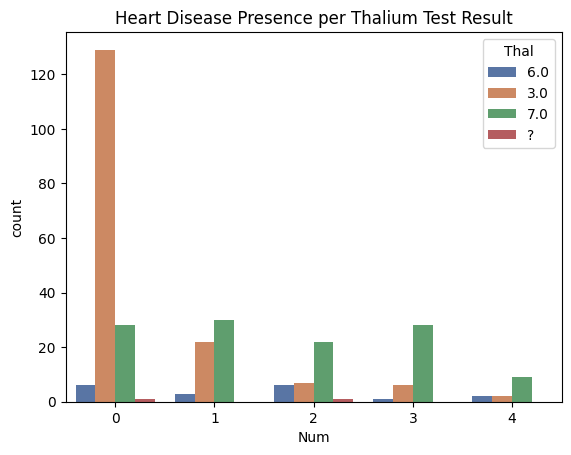

In [66]:
num_description = tdf['Num'].describe()

description_df = pd.DataFrame(num_description).reset_index()
description_df.columns = ['Statistic', 'Value']

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=description_df.values, colLabels=description_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.savefig('num_description.png', bbox_inches='tight', dpi=300)
plt.show()

# ========== Presence of Heart disease based on the Classes of (Y) =============
sns.countplot(x='Num', data=df, palette='deep')
plt.title('Heart Disease Presence')
plt.show()



# ========== Presence of Heart disease based on sex ============================
sns.countplot(x='Num', data=df, palette='deep', hue='Sex')
plt.title('Heart Disease Presence on Male and Female Patients')
plt.show()


# ========== Presence of Heart disease based on Chest pain =====================
sns.countplot(x='Num', data=df, palette='deep', hue='Cp')
plt.title('Heart Disease Presence per Chest Pain Category')
plt.show()


# ========== Presence of Heart disease based on Fasting blood sugar level ======
sns.countplot(x='Num', data=df, palette='deep', hue='Fbs')
plt.title('Heart Disease Presence per Fasting Blood Sugar Condition')
plt.show()


# ========== Presence of Heart disease based on Resting ECG ====================
sns.countplot(x='Num', data=df, palette='deep', hue='Restecg')
plt.title('Heart Disease Presence per ECG results')
plt.show()

# ======== Presence of Heart disease based on Exercise Induced Angina ==========
sns.countplot(x='Num', data=df, palette='deep', hue='Exerciseangina')
plt.title('Heart Disease Presence per Exercise-Induced Angina Experience')
plt.show()



# ======== Presence of Heart disease based on Slope Category ===================
sns.countplot(x='Num', data=df, palette='deep', hue='Slope')
plt.title('Heart Disease Presence per Slope Category')
plt.show()

# ======== Presence of Heart disease based on Thalium Test Result ==============
sns.countplot(x='Num', data=df, palette='deep', hue='Thal')
plt.title('Heart Disease Presence per Thalium Test Result')
plt.show()


**MULTI-CLASS LOGISTIC REGRESSION ALGORITHM**

**REF** : https://github.com/bamtak/machine-learning-implemetation-python/blob/master/Multi%20Class%20Logistic%20Regression.ipynb

In [67]:
import numpy as np

class Ref_MultiClassLogisticRegression:
    def __init__(self, max_iter=10000, threshold=1e-3):
        # Number of iterations and stopping threshold
        self.max_iter = max_iter
        self.threshold = threshold

    def fit(self, X, y, learning_rate=0.001, batch_size=64, random_seed=4, verbose=False):
        np.random.seed(random_seed)
        self.classes = np.unique(y)  # Get unique class labels
        self.class_to_index = {c: i for i, c in enumerate(self.classes)}  # Map classes to indices

        # Add bias term to the input features
        X = self.add_bias(X)

        # Convert labels to one-hot encoding
        y_one_hot = self.one_hot_encode(y)

        # Initialize weights randomly
        self.weights = np.zeros((len(self.classes), X.shape[1]))

        # Store loss values for tracking
        self.losses = []

        for i in range(self.max_iter):
            # Predict probabilities
            predictions = self.predict_probabilities(X)

            # Compute the loss
            loss = self.cross_entropy(y_one_hot, predictions)
            self.losses.append(loss)

            # Select a random batch of data
            batch_indices = np.random.choice(X.shape[0], batch_size, replace=False)
            X_batch, y_batch = X[batch_indices], y_one_hot[batch_indices]

            # Compute the gradient and update weights
            gradient = np.dot((y_batch - self.predict_probabilities(X_batch)).T, X_batch)
            self.weights += learning_rate * gradient

            # Check for convergence
            if np.abs(gradient).max() < self.threshold:
                break

            if verbose and i % 1000 == 0:
                print(f"Iteration {i}, Loss: {loss:.4f}")

    def predict(self, X):
        # Add bias term and predict probabilities
        X = self.add_bias(X)
        probabilities = self.predict_probabilities(X)

        # Return the class with the highest probability
        return self.classes[np.argmax(probabilities, axis=1)]

    def predict_probabilities(self, X):
        # Computing the linear combination and apply softmax
        scores = np.dot(X, self.weights.T)
        return self.softmax(scores)

    def softmax(self, z):
        # Apply the softmax function
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def add_bias(self, X):
        # Add a column of ones to include the bias term
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def one_hot_encode(self, y):
        # Convert class labels to one-hot encoding
        encoded = np.zeros((y.size, len(self.classes)))
        for i, label in enumerate(y):
            encoded[i, self.class_to_index[label]] = 1
        return encoded

    def cross_entropy(self, y_true, y_pred):
        # Compute the cross-entropy loss
        return -np.mean(np.sum(y_true * np.log(y_pred + 1e-15), axis=1))

    def score(self, X, y):
        # Computing accuracy
        predictions = self.predict(X)
        return np.mean(predictions == y)


# Individual Contribution

In this scratch algorithm of MCLR, I am going to alter the predict function using a neural network (feedforward neural network or fully connected neural network)

In [68]:
import numpy as np

class Neural_MultiClassLogisticRegression:
    def __init__(self, max_iter=10000, threshold=1e-3):
        # Number of iterations and stopping threshold
        self.max_iter = max_iter
        self.threshold = threshold

    def fit(self, X, y, learning_rate=0.001, batch_size=64, random_seed=4, verbose=False):
        np.random.seed(random_seed)
        self.classes = np.unique(y)  # Getting unique class labels
        self.class_to_index = {c: i for i, c in enumerate(self.classes)}  # Mapping classes to indices

        # Adding the bias term to the input features
        X = self.add_bias(X)

        # Converting labels to one-hot encoding
        y_one_hot = self.one_hot_encode(y)

        # Initializing random weights
        self.weights = np.zeros((len(self.classes), X.shape[1]))

        # Store loss values for tracking
        self.losses = []

        for i in range(self.max_iter):
            # Probabilty prediction
            predictions = self.predict_probabilities(X)

            # Loss computation
            loss = self.cross_entropy(y_one_hot, predictions)
            self.losses.append(loss)

            # Selection of random batch data
            batch_indices = np.random.choice(X.shape[0], batch_size, replace=False)
            X_batch, y_batch = X[batch_indices], y_one_hot[batch_indices]

            # Computing the gradient and updating weights
            gradient = np.dot((y_batch - self.predict_probabilities(X_batch)).T, X_batch)
            self.weights += learning_rate * gradient

            # convergence check
            if np.abs(gradient).max() < self.threshold:
                break

            if verbose and i % 1000 == 0:
                print(f"Iteration {i}, Loss: {loss:.4f}")

    # def predict(self, X):
    #     # Add bias term and predict probabilities
    #     X = self.add_bias(X)
    #     probabilities = self.predict_probabilities(X)

    #     # Return the class with the highest probability
    #     return self.classes[np.argmax(probabilities, axis=1)]

    def predict_probabilities(self, X):
        # Compute the linear combination and apply softmax
        scores = np.dot(X, self.weights.T)
        return self.softmax(scores)

    def softmax(self, z):
        # Apply the softmax function
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def add_bias(self, X):
        # Add a column of ones to include the bias term
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def one_hot_encode(self, y):
        # Convert class labels to one-hot encoding
        encoded = np.zeros((y.size, len(self.classes)))
        for i, label in enumerate(y):
            encoded[i, self.class_to_index[label]] = 1
        return encoded

    def cross_entropy(self, y_true, y_pred):
        # Compute the cross-entropy loss
        return -np.mean(np.sum(y_true * np.log(y_pred + 1e-15), axis=1))

    def score(self, X, y):
        # variables to compute the accuracy
        predictions = self.predict(X)
        return np.mean(predictions == y)

#===============  Basic Structure of the feed forward neural network ======================
#====  Input Layer (n features) -> Hidden Layer 1 (ReLU) -> Hidden Layer 2 (ReLU) -> Output Layer (Softmax / None) =================


    def neural_network_predict(self, X, y_true, hidden_units=32, learning_rate=0.001, epochs=1000):
        # Neural network for predicting the final classes
        np.random.seed(4)
        X = self.add_bias(X)  # Adding bias to input
        input_dim = X.shape[1]
        output_dim = len(self.classes)

        # Initializing the weights for the hidden layer and output layer
        W_hid = np.random.randn(input_dim, hidden_units) * 0.01
        W_op = np.random.randn(hidden_units, output_dim) * 0.01

        for epoch in range(epochs):
            # Forward pass
            hidden_lr = np.dot(X, W_hid)
            hidden_lr = np.maximum(0, hidden_lr)  # ReLU activation function
            output_layer = np.dot(hidden_lr, W_op)
            predictions = self.softmax(output_layer)

            # Concept of Backpropagation
            error = predictions - self.one_hot_encode(y_true)
            dW_output = np.dot(hidden_lr.T, error) / X.shape[0]
            d_hidden = np.dot(error, W_op.T)
            d_hidden[hidden_lr <= 0] = 0
            dW_hidden = np.dot(X.T, d_hidden) / X.shape[0]

            # Updated weights
            W_op -= learning_rate * dW_output
            W_hid -= learning_rate * dW_hidden

        # Predicting the final class
        hidden_lr = np.dot(X, W_hid)
        hidden_lr = np.maximum(0, hidden_lr)  # ReLU activation function
        output_layer = np.dot(hidden_lr, W_op)
        probabilities = self.softmax(output_layer)

        return self.classes[np.argmax(probabilities, axis=1)]


Model Training and prediction

In [69]:
data = tdf.copy()

X = data.drop(columns=[ 'Ca','Thal', 'Num'])
y = data['Num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Labels = ["Age", "Sex", "Cp", "Restbps", "Chol", "Fbs", "Restecg", "Heartrate", "Exerciseangina","Oldpeak", "Slope", "Ca", "Thal", "Num"]




print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


model = Neural_MultiClassLogisticRegression(max_iter=1000, threshold=1e-3)

model.fit(X_train, y_train, learning_rate=0.001, batch_size=64, random_seed=4, verbose=True)

predictions = model.neural_network_predict(X_test,y_test)

# Print some predictions and actual values for comparison
print("Predictions:", predictions[:5])
print("Actual values:", y_test[:5])

X_train shape: (237, 11)
X_test shape: (60, 11)
y_train shape: (237,)
y_test shape: (60,)
Iteration 0, Loss: 1.6094
Predictions: [0 0 0 2 0]
Actual values: 169    0
214    1
63     0
155    1
5      0
Name: Num, dtype: int64


CONFUSION MATRIX FOR MCLR NEURAL NETWORK PREDICTION

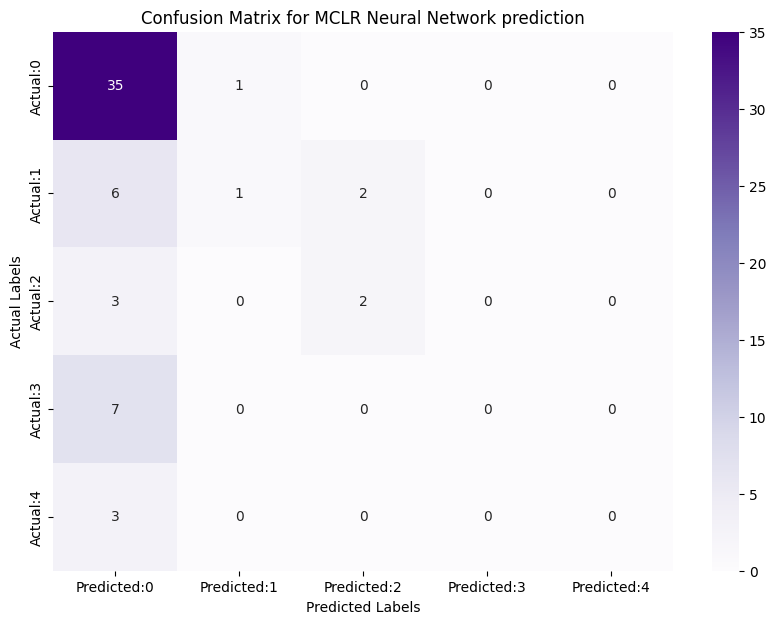

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.65      0.97      0.78        36
     Class 1       0.50      0.11      0.18         9
     Class 2       0.50      0.40      0.44         5
     Class 3       0.00      0.00      0.00         7
     Class 4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.33      0.30      0.28        60
weighted avg       0.51      0.63      0.53        60



In [70]:
# Assuming y_test and y_pred are your true labels and predicted labels, respectively

y_pred = model.neural_network_predict(X_test,y_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted:0','Predicted:1', 'Predicted:2', 'Predicted:3', 'Predicted:4'],
            yticklabels=['Actual:0','Actual:1', 'Actual:2', 'Actual:3', 'Actual:4'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for MCLR Neural Network prediction')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Class 0','Class 1', 'Class 2', 'Class 3', 'Class 4']))


# NEURAL NETWORK CLASSIFIER

In [71]:
# Assigning the inputs

X = tdf.iloc[:, :-1].values
y = tdf.iloc[:, -1].values

# splitting the dataset into testing and training format

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# creating one hot encoder
ohe = OneHotEncoder(sparse_output=False)                                     # ==== One hot encode = ohe
y_train_encoded = ohe.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = ohe.transform(y_test.reshape(-1, 1))


# Creating feed forward neural network model

def ff_nn_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(input_dim,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



input_dim = X_train.shape[1]
output_dim = len(np.unique(y_train))
hidden_units = 32


model = ff_nn_model(input_dim, output_dim)

# Training the model
epochs = 5
batch_size = 32
history = model.fit(X_train, y_train_encoded,
                    validation_data=(X_test, y_test_encoded),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1)



# Making predictions on new data
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)


print("Predictions:", y_pred[:30])
print("Actual values:", y_test[:30])



# True label Comparison
accuracy = np.mean(y_pred == y_test)
print('========== Model Accuracy ===================')
print(f'Accuracy: {accuracy:.4f}')


# Evaluation phase
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print('========== Test set loss and Evaluation ===================')
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')



Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - accuracy: 0.1722 - loss: 1.6808 - val_accuracy: 0.3000 - val_loss: 1.5247
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3492 - loss: 1.4875 - val_accuracy: 0.4889 - val_loss: 1.3807
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5891 - loss: 1.3539 - val_accuracy: 0.5444 - val_loss: 1.2603
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5343 - loss: 1.2965 - val_accuracy: 0.5444 - val_loss: 1.1642
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5591 - loss: 1.1929 - val_accuracy: 0.5444 - val_loss: 1.0906
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual values: [0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 2 0 3 4 2 0 3 0 1 1 0 0]
========== Model Accuracy ===================
Accuracy: 0.5444
========== Test set loss and Evaluation ===================
Test Loss: 1.0906
Test Accuracy: 0.5444


# Confusion Matrix for Neural Network Classifier

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


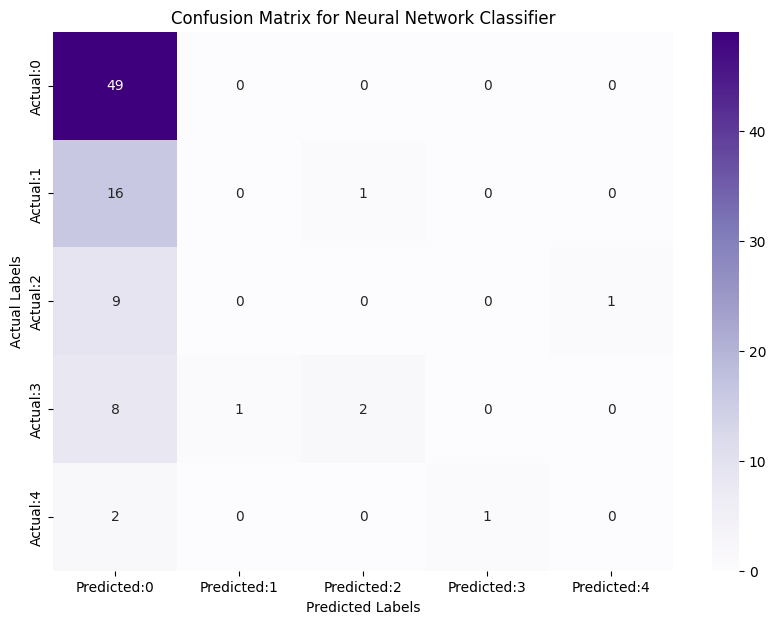

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.58      1.00      0.74        49
     Class 1       0.00      0.00      0.00        17
     Class 2       0.00      0.00      0.00        10
     Class 3       0.00      0.00      0.00        11
     Class 4       0.00      0.00      0.00         3

    accuracy                           0.54        90
   macro avg       0.12      0.20      0.15        90
weighted avg       0.32      0.54      0.40        90



In [72]:
# Assuming y_test and y_pred are your true labels and predicted labels, respectively
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted:0','Predicted:1', 'Predicted:2', 'Predicted:3', 'Predicted:4'],
            yticklabels=['Actual:0','Actual:1', 'Actual:2', 'Actual:3', 'Actual:4'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Neural Network Classifier')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Class 0','Class 1', 'Class 2', 'Class 3', 'Class 4']))

# CROSS_VALIDATION

In [73]:
#cross validation

Algo_MCLR = LogisticRegression(C=1e20, multi_class='multinomial', solver='lbfgs', max_iter=1000)
data = tdf.copy()
X = data.drop(columns=[ 'Ca', 'Thal','Num'])
y = data['Num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Fitting the model
Algo_MCLR.fit(X_train, y_train)
y_pred = Algo_MCLR.predict(X_test)
# Score of the model
train_result = round(Algo_MCLR.score(X_train, y_train), 3)
test_result = round(Algo_MCLR.score(X_test, y_test), 3)



print('Training Score: ', train_result)
print('Testing Score: ', test_result)



print("\nFirst 10 Predictions and Actual Values:")
for i in range(10):
    print(f"Prediction: {y_pred[i]}, Actual: {y_test.values[i]}")

Training Score:  0.628
Testing Score:  0.556

First 10 Predictions and Actual Values:
Prediction: 0, Actual: 0
Prediction: 0, Actual: 1
Prediction: 0, Actual: 0
Prediction: 4, Actual: 1
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 3, Actual: 1
Prediction: 0, Actual: 0


#CONFUSION MATRIX FOR MULTI-CLASS LOGISTIC REGRESSION (Cross-Validation)

This algorithm is imported from the library

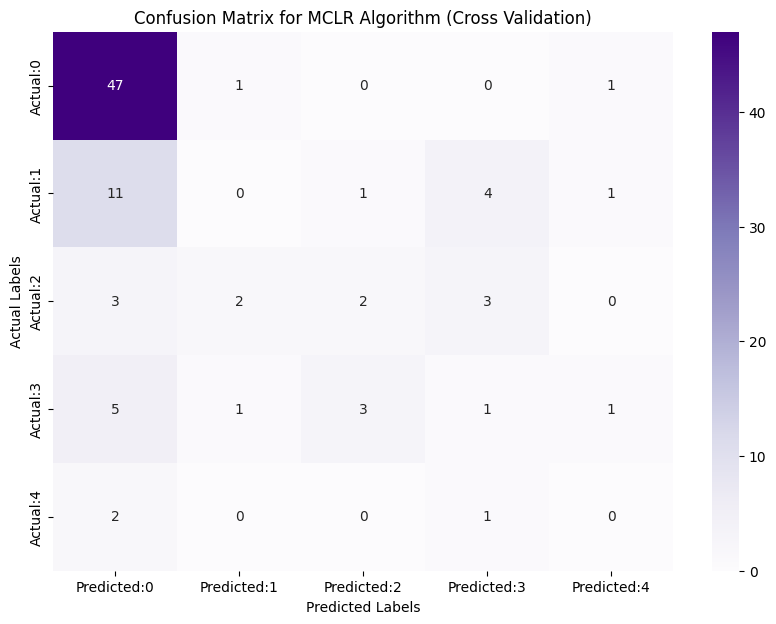

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.69      0.96      0.80        49
     Class 1       0.00      0.00      0.00        17
     Class 2       0.33      0.20      0.25        10
     Class 3       0.11      0.09      0.10        11
     Class 4       0.00      0.00      0.00         3

    accuracy                           0.56        90
   macro avg       0.23      0.25      0.23        90
weighted avg       0.43      0.56      0.48        90



In [74]:
y_pred = Algo_MCLR.predict(X_test)


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted:0','Predicted:1', 'Predicted:2', 'Predicted:3', 'Predicted:4'],
            yticklabels=['Actual:0','Actual:1', 'Actual:2', 'Actual:3', 'Actual:4'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for MCLR Algorithm (Cross Validation)')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Class 0','Class 1', 'Class 2', 'Class 3', 'Class 4']))

#SVM - CLASSIFIER

In [75]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
data = tdf.copy()
X = data.drop(columns=['Ca', 'Thal','Num'])
y = data['Num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = OneVsRestClassifier(SVC(kernel='rbf'))
svm_model.fit(X_train, y_train)
Y_pred = svm_model.predict(X_test)

# Model evaluation
print("Classification Report:\n", classification_report(y_test, Y_pred))
print("Accuracy Score:", accuracy_score(y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77        36
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.12      0.20      0.15        60
weighted avg       0.37      0.60      0.46        60

Accuracy Score: 0.6


#CONFUSION MATRIX FOR SVM CLASSIFIER

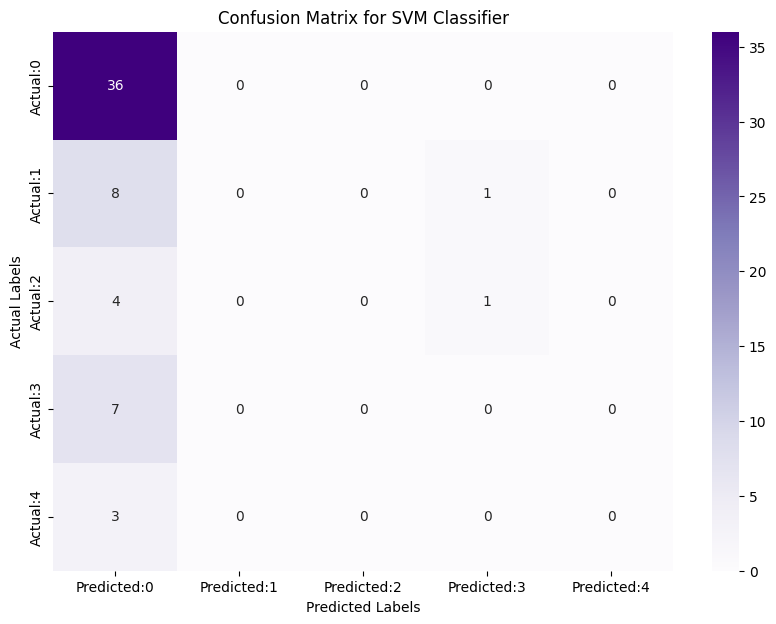

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.62      1.00      0.77        36
     Class 1       0.00      0.00      0.00         9
     Class 2       0.00      0.00      0.00         5
     Class 3       0.00      0.00      0.00         7
     Class 4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.12      0.20      0.15        60
weighted avg       0.37      0.60      0.46        60



In [76]:
y_pred = svm_model.predict(X_test)


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted:0','Predicted:1', 'Predicted:2', 'Predicted:3', 'Predicted:4'],
            yticklabels=['Actual:0','Actual:1', 'Actual:2', 'Actual:3', 'Actual:4'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Class 0','Class 1', 'Class 2', 'Class 3', 'Class 4']))